<a href="https://colab.research.google.com/github/rafig38/IA_UFS/blob/main/prever_tipo_vinho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predição do tipo de vinho usando Deep Learning

Porjeto base: https://www.geeksforgeeks.org/prediction-of-wine-type-using-deep-learning/?ref=rp

## Carregando os dados

In [ ]:
# Carregando os pacotes necessários
library(readr)

# Lendo os dados do vinho branco
white <- read_delim("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", ";")

# Lendo os dados do vinho tinto
red <- read_delim("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", ";")


Rows: 4898 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
# Visualizando as primeiras linhas de 'red'
head(red)


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [ ]:
# Visualizando as últimas linhas de 'white'
tail(white)


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6.5,0.23,0.38,1.3,0.032,29,112,0.99298,3.29,0.54,9.7,5
6.2,0.21,0.29,1.6,0.039,24,92,0.99114,3.27,0.50,11.2,6
6.6,0.32,0.36,8.0,0.047,57,168,0.99490,3.15,0.46,9.6,5
6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4,6
5.5,0.29,0.30,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,7
6.0,0.21,0.38,0.8,0.020,22,98,0.98941,3.26,0.32,11.8,6


In [ ]:
# Pegando uma amostra de cinco linhas de 'red'
red[sample(nrow(red), 5), ]


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8.3,0.76,0.29,4.2,0.075,12,16,0.99650,3.45,0.68,11.5,6
7.5,0.50,0.36,6.1,0.071,17,102,0.99780,3.35,0.80,10.5,5
6.7,0.64,0.23,2.1,0.080,11,119,0.99538,3.36,0.70,10.9,5
7.2,0.65,0.02,2.3,0.094,5,31,0.99930,3.67,0.80,9.7,5
7.7,0.61,0.18,2.4,0.083,6,20,0.99630,3.29,0.60,10.2,6


In [ ]:
# Descrição dos dados - 'white'
summary(white)


 fixed acidity    volatile acidity  citric acid     residual sugar  
 Min.   : 3.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.300   1st Qu.:0.2100   1st Qu.:0.2700   1st Qu.: 1.700  
 Median : 6.800   Median :0.2600   Median :0.3200   Median : 5.200  
 Mean   : 6.855   Mean   :0.2782   Mean   :0.3342   Mean   : 6.391  
 3rd Qu.: 7.300   3rd Qu.:0.3200   3rd Qu.:0.3900   3rd Qu.: 9.900  
 Max.   :14.200   Max.   :1.1000   Max.   :1.6600   Max.   :65.800  
   chlorides       free sulfur dioxide total sulfur dioxide    density      
 Min.   :0.00900   Min.   :  2.00      Min.   :  9.0        Min.   :0.9871  
 1st Qu.:0.03600   1st Qu.: 23.00      1st Qu.:108.0        1st Qu.:0.9917  
 Median :0.04300   Median : 34.00      Median :134.0        Median :0.9937  
 Mean   :0.04577   Mean   : 35.31      Mean   :138.4        Mean   :0.9940  
 3rd Qu.:0.05000   3rd Qu.: 46.00      3rd Qu.:167.0        3rd Qu.:0.9961  
 Max.   :0.34600   Max.   :289.00      Max.   :440.0   

In [ ]:
# Verificando valores nulos em 'red'
is.na(red)


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


## Criando histograma

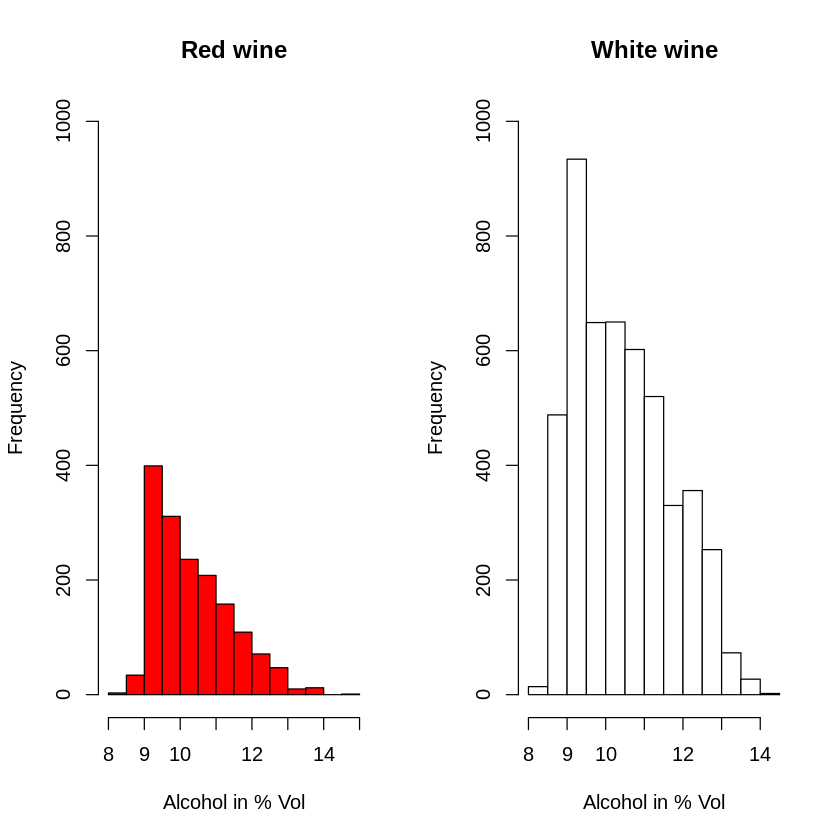

In [ ]:
# Carregando a biblioteca necessária
library(ggplot2)

# Criando histograma para distribuição de álcool
par(mfrow=c(1,2))
hist(red$alcohol, breaks=10, col='red', main="Red wine", xlab="Alcohol in % Vol", ylab="Frequency", ylim=c(0,1000))
hist(white$alcohol, breaks=10, col='white', main="White wine", xlab="Alcohol in % Vol", ylab="Frequency", ylim=c(0,1000))


In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




## Dividindo o conjunto de dados para treinamento e validação

In [ ]:
# Adicionando a coluna 'type' ao 'red' com valor um
red$type <- 1

# Adicionando a coluna 'type' ao 'white' com valor zero
white$type <- 0

# Anexando 'white' a 'red'
wines <- rbind(red, white)

# Importando a função 'createDataPartition' do pacote 'caret'
library(caret)

# Definindo X e y
X <- wines[, 1:11]
y <- as.factor(wines$type)

# Dividindo o conjunto de dados para treinamento e validação
set.seed(45)
trainIndex <- createDataPartition(y, p = 0.66, list = FALSE)
X_train <- X[trainIndex, ]
y_train <- y[trainIndex]
X_test <- X[-trainIndex, ]
y_test <- y[-trainIndex]


Loading required package: lattice



## Arquitetura da rede

In [ ]:
install.packages("keras")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppTOML’, ‘here’, ‘png’, ‘config’, ‘tfautograph’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’




In [ ]:
# Carregando a biblioteca necessária
library(keras)

# Inicializando o construtor
model <- keras_model_sequential()

# Adicionando uma camada de entrada
model %>%
  layer_dense(units = 12, activation = 'relu', input_shape = c(11))

# Adicionando uma camada oculta
model %>%
  layer_dense(units = 9, activation = 'relu')

# Adicionando uma camada de saída
model %>%
  layer_dense(units = 1, activation = 'sigmoid')

# Forma de saída do modelo
# cat("Model output shape: ", dim(predict(model, as.matrix(X_train[1:10, ]))), "\n")

# Resumo do modelo
summary(model)

# Configuração do modelo
# cat("Model config:\n")
# str(keras::get_config(model))

# Listando todos os tensores de peso
# cat("Model weights:\n")
# str(keras::get_weights(model))

# Compilando o modelo
model %>% compile(
  loss = 'binary_crossentropy',
  optimizer = 'adam',
  metrics = c('accuracy')
)


Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense (Dense)                      (None, 12)                      144         
 dense_1 (Dense)                    (None, 9)                       117         
 dense_2 (Dense)                    (None, 1)                       10          
Total params: 271 (1.06 KB)
Trainable params: 271 (1.06 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


## Treinamento e previsão

In [ ]:
# Convertendo y_train e y_test para numérico
y_train <- as.numeric(as.character(y_train))
y_test <- as.numeric(as.character(y_test))

# Treinando o modelo
history <- model %>% fit(
  as.matrix(X_train), y_train,
  epochs = 3, batch_size = 1,
  verbose = 1
)

# Prevendo o valor
y_pred <- predict(model, as.matrix(X_test))
print(y_pred)


                [,1]
   [1,] 9.992428e-01
   [2,] 9.992428e-01
   [3,] 9.996110e-01
   [4,] 3.308682e-01
   [5,] 9.456758e-01
   [6,] 3.919649e-01
   [7,] 3.850169e-02
   [8,] 9.770483e-01
   [9,] 9.996374e-01
  [10,] 9.927587e-01
  [11,] 4.679905e-02
  [12,] 9.926786e-01
  [13,] 9.985664e-01
  [14,] 9.977876e-01
  [15,] 1.628301e-01
  [16,] 9.675158e-01
  [17,] 9.999443e-01
  [18,] 8.046526e-01
  [19,] 8.861696e-01
  [20,] 9.986849e-01
  [21,] 9.895742e-01
  [22,] 9.895742e-01
  [23,] 9.858181e-01
  [24,] 9.176034e-01
  [25,] 9.326062e-01
  [26,] 9.967600e-01
  [27,] 9.600788e-01
  [28,] 9.997132e-01
  [29,] 9.089935e-01
  [30,] 4.218958e-01
  [31,] 9.996240e-01
  [32,] 9.990143e-01
  [33,] 9.367576e-01
  [34,] 9.442830e-01
  [35,] 9.967191e-01
  [36,] 9.806992e-01
  [37,] 9.995928e-01
  [38,] 9.994925e-01
  [39,] 9.994925e-01
  [40,] 9.780292e-01
  [41,] 9.751142e-01
  [42,] 8.183320e-01
  [43,] 9.881502e-01
  [44,] 9.768693e-01
  [45,] 9.881502e-01
  [46,] 9.976574e-01
  [47,] 9.993

In [ ]:
history


Final epoch (plot to see history):
    loss: 0.0851
accuracy: 0.9716 